In [2]:
# Instantiate dataset
from physioex.data import PhysioExDataset

data = PhysioExDataset(
    datasets = ["sleepedf"],
    preprocessing = "raw",  
    selected_channels = ["EEG", "EOG", "EMG"],     
    data_folder = "./data",
)

# you can now access any sequence of epochs in the dataset
signal, label = data[0]

print(signal.shape) # will be [21 (default sequence lenght), 3, 3000]
print(label.shape) # will be [21]

torch.Size([21, 3, 3000])
torch.Size([21])


In [ ]:
# you can now access any sequence of epochs in the dataset
# using a high intex bc at the begining the person is awake
signal, label = data[10000]

# number of 30s window epochs
print(len(data))

print(signal.shape) # will be [21 (default sequence lenght), 3, 3000]
print(label.shape) # will be [21]

print(label)

192884
torch.Size([21, 3, 3000])
torch.Size([21])
tensor([1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


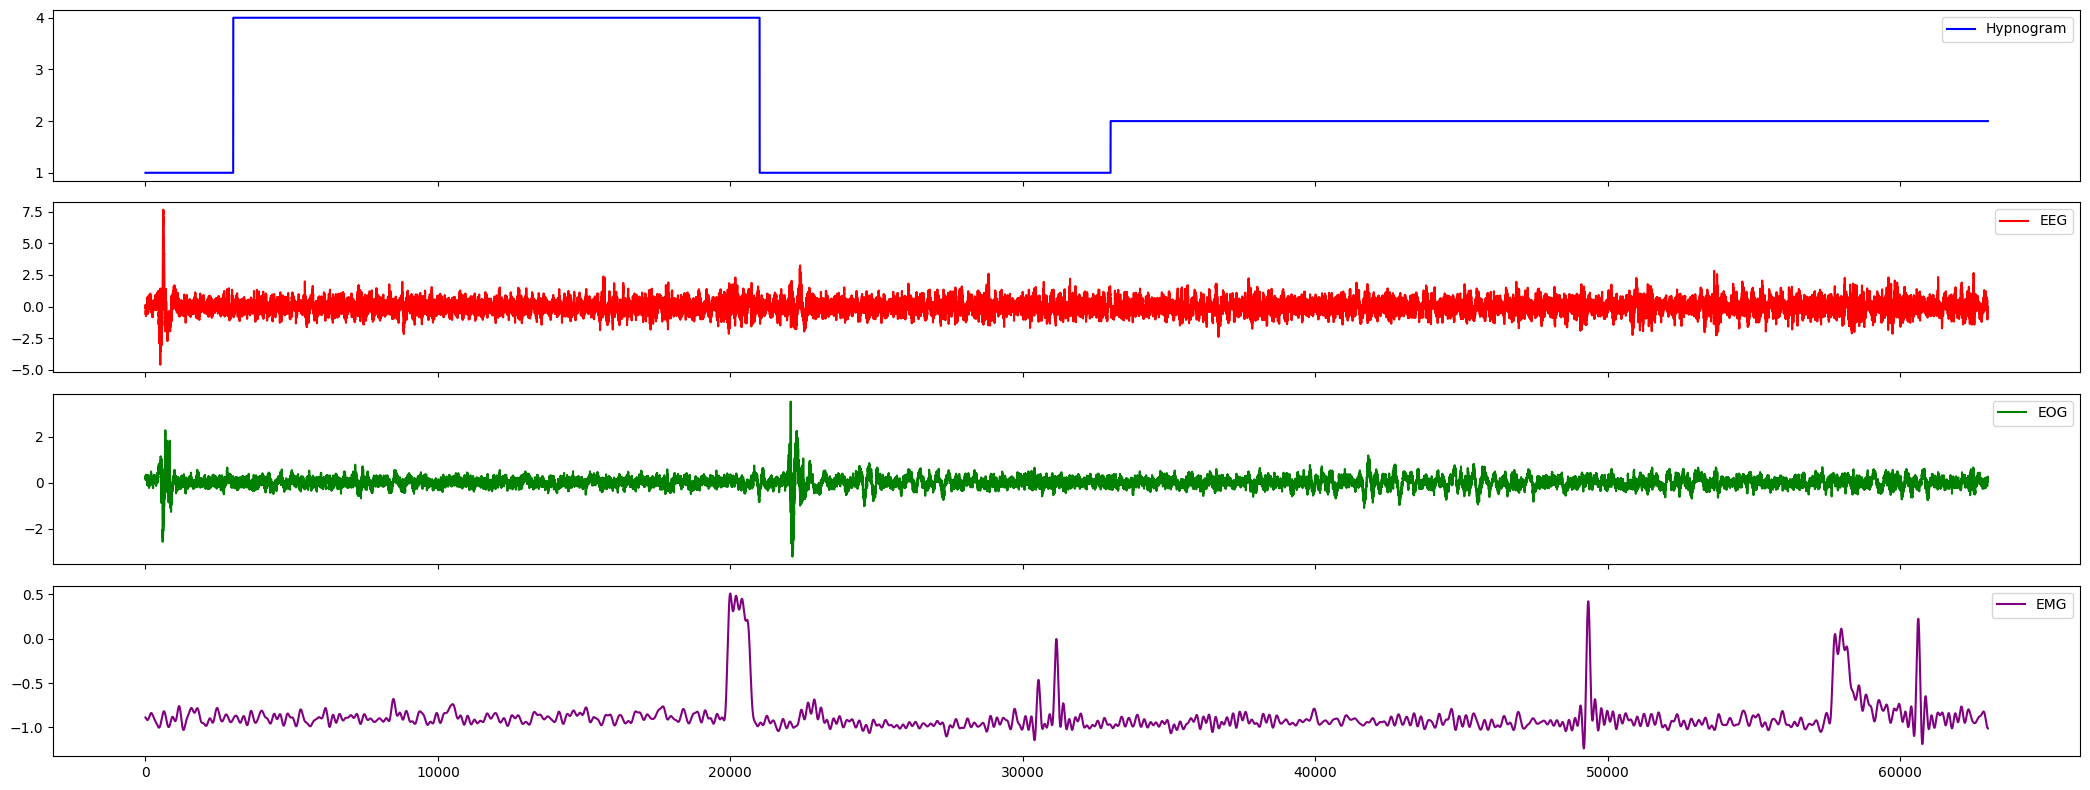

In [ ]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

hypnogram = np.ones((21, 3000)) * label.numpy().reshape(-1, 1)

# plot a subfigure with one column for each element of the sequence (21)
fig, ax = plt.subplots(4, 1, figsize = (21, 8), sharex="col", sharey="row")


hypnogram = hypnogram.reshape( -1 )
signals = signal.numpy().transpose(1, 0, 2).reshape(3, -1)

# set tytle for each subplot
sns.lineplot( x = range(3000*21), y = hypnogram, ax = ax[0], color = "blue", label = "Hypnogram")
# then the channels:
sns.lineplot( x = range(3000*21), y = signals[0], ax = ax[1], color = "red", label = "EEG")
sns.lineplot( x = range(3000*21), y = signals[1], ax = ax[2], color = "green", label = "EOG")
sns.lineplot( x = range(3000*21), y = signals[2], ax = ax[3], color = "purple", label = "EMG")

# set the legend
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

# check the examples notebook "visualize_data.ipynb" to see how to customize the plot properly

plt.tight_layout()

In [7]:
from physioex.data import PhysioExDataModule

datamodule = PhysioExDataModule(
    datasets=["sleepedf"],     # list of datasets to be used
    batch_size=64,             # batch size for the DataLoader
    preprocessing="raw",       # preprocessing method
    selected_channels=["EEG", "EOG", "EMG"],  # channels to be selected
    sequence_length=21,        # length of the sequence
    data_folder="./data",      # path to the data folder
)

# get the DataLoaders
train_loader = datamodule.train_dataloader()
val_loader = datamodule.val_dataloader()
test_loader = datamodule.test_dataloader()

print(len(train_loader)) # number of batches in the training set
print(len(val_loader)) # number of batches in the validation set
print(len(test_loader)) # number of batches in the test set

2036
570
409


In [ ]:
from physioex.train.utils import train, test, finetune

from physioex.train.networks.utils.loss import config as loss_config
from physioex.train.networks import config as network_config

checkpoint_path = "./model/checkpoint"

# first configure the model

# set the model configuration dictonary

# in case your model is from physioex.train.networks
# you can load its configuration

model_config = network_config["tinysleepnet"] 

model_config["loss_call"] = loss_config["cel"] # CrossEntropy Loss
model_config["loss_params"] = dict()
model_config["seq_len"] = 21 # needs to be the same as the DataModule
model_config["in_channels"] = 1 # needs to be the same as the DataModule

# your_model_config["n_classes"] = 5  needs to be set if you are loading a custom SleepModule